In [1]:
# dependancies
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#import orchest
import pickle

In [ ]:
# get data from data integrity
data = orchest.get_inputs()
df = data['eda-df']

In [2]:
df = pd.read_csv('C:\\Users\\Cash Crusaders\\Desktop\\My Portfolio\\Projects\\Data Science Projects\\Machine Learning Project 11 - Car Price Prediction\\dataset\\eda_dataset.csv')

In [ ]:
#data that was not configured or transformed in the eda stage
df['Mileage'] = df['kms_driven'].str.split(' ').str[0]
df.drop(columns='kms_driven',axis=1, inplace=True)

In [3]:
df.head(3)

,Unnamed: 0,name,company,year,Price,fuel_type,Mileage
0,0,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,Petrol,"22,000"
1,1,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000",Petrol,"28,000"
2,2,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000",Diesel,"36,000"


In [4]:
# remove the unnamed column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.head(2)

,name,company,year,Price,fuel_type,Mileage
0,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,Petrol,"22,000"
1,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000",Petrol,"28,000"


In [26]:
# before making any changes lets copy the  data and work with the copy
df_copy = df.copy()
df_copy['Price'] = np.where(df_copy['Price'] == 'Ask For Price',0,df_copy['Price']) 

In [9]:
df.drop(df.index[df['Price']=='Ask For Price'], inplace = True)

In [10]:
df[df['Price']=='Ask For Price'].count()

name         0
company      0
year         0
Price        0
fuel_type    0
Mileage      0
dtype: int64

In [11]:
df.shape

(648, 6)

In [13]:
df_copy['Price'] = df_copy['Price'].astype(float)
# change the ask for price text value in price column and replace it with 0
df_copy['Price'] = df_copy['Price'].replace('Ask For Price', 0)

ValueError: could not convert string to float: 'Ask For Price'

In [10]:
df_copy.head()

,name,company,year,Price,fuel_type,Mileage
0,Maruti Suzuki Alto 800 Vxi,Maruti,2018,0,Petrol,"22,000"
1,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000",Petrol,"28,000"
2,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000",Diesel,"36,000"
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,0,Diesel,"59,000"
4,Mahindra Scorpio SLE BS IV,Mahindra,2015,"3,20,000",Diesel,"48,660"


In [11]:
df_copy.dtypes

name         object
company      object
year          int64
Price        object
fuel_type    object
Mileage      object
dtype: object

In [10]:
def fix_price_datatype():
    for i in range(len(df_copy)):
        cur_price = df_copy.loc[i,'Price']
        if(cur_price!= 0):
            cur_price = float(cur_price.replace(',',''))
            df_copy.loc[i,'Price']=cur_price
#apply function
fix_price_datatype()

In [11]:
df_copy.head(10)

,name,company,year,Price,fuel_type,Mileage
0,Maruti Suzuki Alto 800 Vxi,Maruti,2018,0,Petrol,"22,000"
1,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,Petrol,"28,000"
2,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,Diesel,"36,000"
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,0,Diesel,"59,000"
4,Mahindra Scorpio SLE BS IV,Mahindra,2015,320000.0,Diesel,"48,660"
5,Audi A8,Audi,2017,1000000.0,Petrol,"4,000"
6,Audi Q7,Audi,2014,500000.0,Diesel,"16,934"
7,Maruti Suzuki Alto 800,Maruti,2014,160000.0,Petrol,"35,550"
8,Mahindra Scorpio S10,Mahindra,2016,310000.0,Diesel,"39,522"
9,Maruti Suzuki Alto 800 Vxi,Maruti,2015,75000.0,Petrol,"39,000"


In [12]:
# fixing the mileage column
def fix_mileage_datatype():
    for i in range(len(df_copy)):
        cur_price = df_copy.loc[i,'Mileage']
        if(cur_price!=0):
            cur_price = float(cur_price.replace(',',''))
            df_copy.loc[i,'Mileage']=cur_price
#apply function
fix_mileage_datatype()

In [13]:
df_copy.head(10)

,name,company,year,Price,fuel_type,Mileage
0,Maruti Suzuki Alto 800 Vxi,Maruti,2018,0,Petrol,22000.0
1,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,Petrol,28000.0
2,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,Diesel,36000.0
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,0,Diesel,59000.0
4,Mahindra Scorpio SLE BS IV,Mahindra,2015,320000.0,Diesel,48660.0
5,Audi A8,Audi,2017,1000000.0,Petrol,4000.0
6,Audi Q7,Audi,2014,500000.0,Diesel,16934.0
7,Maruti Suzuki Alto 800,Maruti,2014,160000.0,Petrol,35550.0
8,Mahindra Scorpio S10,Mahindra,2016,310000.0,Diesel,39522.0
9,Maruti Suzuki Alto 800 Vxi,Maruti,2015,75000.0,Petrol,39000.0


In [14]:
df_copy.dtypes

name         object
company      object
year          int64
Price        object
fuel_type    object
Mileage      object
dtype: object

In [15]:
# make the price column to be aa float
df_copy['Price'] = df_copy['Price'].astype(float)
df_copy['Mileage'] = df_copy['Mileage'].astype(float)

In [16]:
df_copy.dtypes

name          object
company       object
year           int64
Price        float64
fuel_type     object
Mileage      float64
dtype: object

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       669 non-null    object 
 1   company    669 non-null    object 
 2   year       669 non-null    int64  
 3   Price      669 non-null    float64
 4   fuel_type  668 non-null    object 
 5   Mileage    669 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 31.5+ KB


In [18]:
# get the mean of prices
df_copy.Price.mean()

385635.2705530643

In [19]:
# deal with the NAN
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='mean')
imputer.fit(df_copy.iloc[:, 3:4])
df_copy.iloc[:, 3:4] = imputer.transform(df_copy.iloc[:, 3:4])

In [20]:
df_copy.head(10)

,name,company,year,Price,fuel_type,Mileage
0,Maruti Suzuki Alto 800 Vxi,Maruti,2018,398132.709877,Petrol,22000.0
1,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.000000,Petrol,28000.0
2,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000.000000,Diesel,36000.0
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,398132.709877,Diesel,59000.0
4,Mahindra Scorpio SLE BS IV,Mahindra,2015,320000.000000,Diesel,48660.0
5,Audi A8,Audi,2017,1000000.000000,Petrol,4000.0
6,Audi Q7,Audi,2014,500000.000000,Diesel,16934.0
7,Maruti Suzuki Alto 800,Maruti,2014,160000.000000,Petrol,35550.0
8,Mahindra Scorpio S10,Mahindra,2016,310000.000000,Diesel,39522.0
9,Maruti Suzuki Alto 800 Vxi,Maruti,2015,75000.000000,Petrol,39000.0


In [21]:
# deal with encoding the fuel type
df_copy.fuel_type.value_counts()

Petrol    369
Diesel    297
LPG         2
Name: fuel_type, dtype: int64

In [22]:
X = df_copy.drop('Price',axis =1)
y = df_copy['Price']

In [23]:
y

0      398132.709877
1      325000.000000
2      575000.000000
3      398132.709877
4      320000.000000
           ...      
664    270000.000000
665    110000.000000
666    300000.000000
667    260000.000000
668    390000.000000
Name: Price, Length: 669, dtype: float64

In [24]:
X = X.iloc[:, :5].values

In [25]:
X

array([['Maruti Suzuki Alto 800 Vxi', 'Maruti', 2018, 'Petrol', 22000.0],
       ['Hyundai Grand i10 Magna 1.2 Kappa VTVT', 'Hyundai', 2014,
        'Petrol', 28000.0],
       ['Ford EcoSport Titanium 1.5L TDCi', 'Ford', 2014, 'Diesel',
        36000.0],
       ...,
       ['Toyota Corolla Altis', 'Toyota', 2009, 'Petrol', 132000.0],
       ['Tata Zest XM Diesel', 'Tata', 2018, 'Diesel', 27000.0],
       ['Mahindra Quanto C8', 'Mahindra', 2013, 'Diesel', 40000.0]],
      dtype=object)

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [27]:
X

array([[0.0, 0.0, 1.0, ..., 'Maruti', 2018, 22000.0],
       [0.0, 0.0, 1.0, ..., 'Hyundai', 2014, 28000.0],
       [1.0, 0.0, 0.0, ..., 'Ford', 2014, 36000.0],
       ...,
       [0.0, 0.0, 1.0, ..., 'Toyota', 2009, 132000.0],
       [1.0, 0.0, 0.0, ..., 'Tata', 2018, 27000.0],
       [1.0, 0.0, 0.0, ..., 'Mahindra', 2013, 40000.0]], dtype=object)

In [ ]:

# We have to fix the fuel type class, label encode it- do this part in the feature engineering scipt
# have to put all the function is constructive function codes so that we can see the workflow on prefect

In [28]:
# check the dataset through Pandas profiling
# Pandas profiling
from pandas_profiling import ProfileReport
data_profile = ProfileReport(df_copy, explorative = True)
data_profile.to_file("preprocessed_data_analysis.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Anaconda\envs\machine-learning-env\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
c:\Anaconda\envs\machine-learning-env\lib\site-packages\multimethod\__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot: >

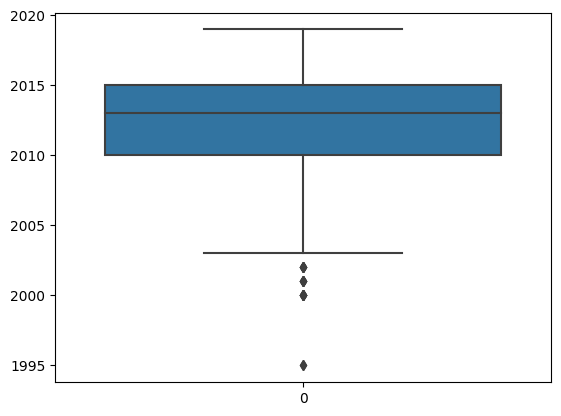

In [29]:
# have to fix the outliers  they affectt the distribution
sns.boxplot(df_copy['year'])

In [31]:
# removee the outliers
def remove_year_outliers(df):
    # calculate the Quantiles(Q1 and Q3)
    Q1 = df['year'].quantile(0.25)
    Q3 = df['year'].quantile(0.75)
    # calclulate the Inter_quatile_range IQR
    IQR = Q3 - Q1
    # calculate the lower limit and upper  limit (LL & UL)
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    # now filter the column to remove the outliers
    # replace all the values that are less or equal to the LL in the hours per weeek column with the LL
    df.loc[df['year'] <= LL, 'year'] = LL
    # do the same for values greater than the UL
    df.loc[df['year'] >= UL, 'year'] = UL

In [32]:
remove_year_outliers(df_copy)

<AxesSubplot: >

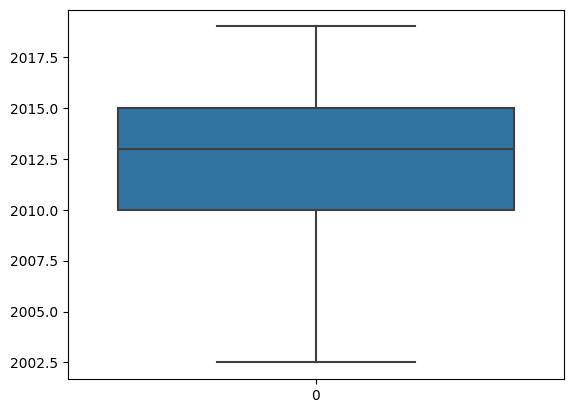

In [33]:
sns.boxplot(df_copy['year'])

<AxesSubplot: >

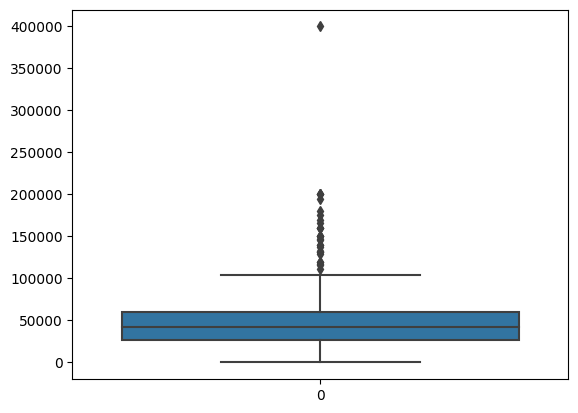

In [30]:
sns.boxplot(df_copy['Mileage'])

In [34]:
# removee the outliers
def remove_mileage_outliers(df):
    # calculate the Quantiles(Q1 and Q3)
    Q1 = df['Mileage'].quantile(0.25)
    Q3 = df['Mileage'].quantile(0.75)
    # calclulate the Inter_quatile_range IQR
    IQR = Q3 - Q1
    # calculate the lower limit and upper  limit (LL & UL)
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    # now filter the column to remove the outliers
    # replace all the values that are less or equal to the LL in the hours per weeek column with the LL
    df.loc[df['Mileage'] <= LL, 'Mileage'] = LL
    # do the same for values greater than the UL
    df.loc[df['Mileage'] >= UL, 'Mileage'] = UL

In [35]:
remove_mileage_outliers(df_copy)

<AxesSubplot: >

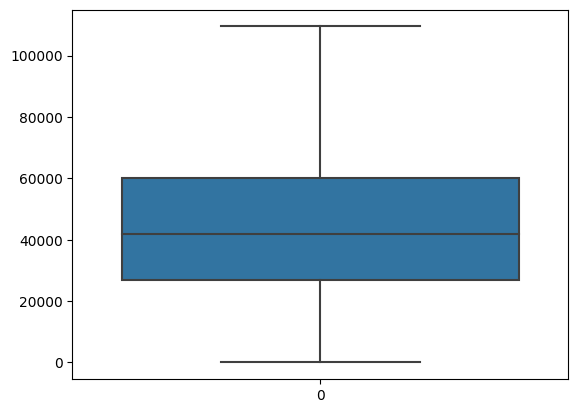

In [36]:
sns.boxplot(df_copy['Mileage'])

In [ ]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample


In [ ]:
median=df.Age.median()

In [ ]:
impute_nan(df,"Age",median)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])